In [3]:
'''
NAME
    NetCDF with Python
PURPOSE
    To demonstrate how to read and write data with NetCDF files using
    a NetCDF file from the NCEP/NCAR Reanalysis.
    Plotting using Matplotlib and Basemap is also shown.
PROGRAMMER(S)
    Chris Slocum
REVISION HISTORY
    20140320 -- Initial version created and posted online
    20140722 -- Added basic error handling to ncdump
                Thanks to K.-Michael Aye for highlighting the issue
REFERENCES
    netcdf4-python -- http://code.google.com/p/netcdf4-python/
    NCEP/NCAR Reanalysis -- Kalnay et al. 1996
        http://dx.doi.org/10.1175/1520-0477(1996)077<0437:TNYRP>2.0.CO;2
'''

'\nNAME\n    NetCDF with Python\nPURPOSE\n    To demonstrate how to read and write data with NetCDF files using\n    a NetCDF file from the NCEP/NCAR Reanalysis.\n    Plotting using Matplotlib and Basemap is also shown.\nPROGRAMMER(S)\n    Chris Slocum\nREVISION HISTORY\n    20140320 -- Initial version created and posted online\n    20140722 -- Added basic error handling to ncdump\n                Thanks to K.-Michael Aye for highlighting the issue\nREFERENCES\n    netcdf4-python -- http://code.google.com/p/netcdf4-python/\n    NCEP/NCAR Reanalysis -- Kalnay et al. 1996\n        http://dx.doi.org/10.1175/1520-0477(1996)077<0437:TNYRP>2.0.CO;2\n'

In [4]:
import datetime as dt  # Python standard library datetime  module
import numpy as np
import netCDF4  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

In [5]:
import sys
print(sys.executable)

C:\Users\sgeo\AppData\Local\Continuum\anaconda3\envs\py36\python.exe


In [6]:
def ncdump(nc_fid, verb=True):
    '''
    ncdump outputs dimensions, variables and their attribute information.
    The information is similar to that of NCAR's ncdump utility.
    ncdump requires a valid instance of Dataset.

    Parameters
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    verb : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print( "\t\ttype:", repr(nc_fid.variables[key].dtype))
            for ncattr in nc_fid.variables[key].ncattrs():
                print( '\t\t%s:' % ncattr,\
                      repr(nc_fid.variables[key].getncattr(ncattr)))
        except KeyError:
            print( "\t\tWARNING: %s does not contain variable attributes" % key)

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print( "NetCDF Global Attributes:")
        for nc_attr in nc_attrs:
            print( '\t%s:' % nc_attr, repr(nc_fid.getncattr(nc_attr)))
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # Dimension shape information.
    if verb:
        print( "NetCDF dimension information:")
        for dim in nc_dims:
            print( "\tName:", dim) 
            print( "\t\tsize:", len(nc_fid.dimensions[dim]))
            print_ncattr(dim)
    # Variable information.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if verb:
        print( "NetCDF variable information:")
        for var in nc_vars:
            if var not in nc_dims:
                print( '\tName:', var)
                print( "\t\tdimensions:", nc_fid.variables[var].dimensions)
                print( "\t\tsize:", nc_fid.variables[var].size)
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars

In [7]:
nc_f = './Downloads/c_gls_FAPAR300-RT0_201905310000_GLOBE_PROBAV_V1.0.1.nc'  # Your filename


In [15]:
nc_fid = netCDF4.Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)
# Extract data from NetCDF file
lats = nc_fid.variables['lat'][:]  # extract/copy the data
lons = nc_fid.variables['lon'][:]

NetCDF Global Attributes:
	Conventions: 'CF-1.6'
	long_name: 'Fraction of Absorbed Photosynthetically Active Radiation'
	processing_mode: 'Near real time'
	references: 'http://land.copernicus.eu/global/products/fapar'
	platform: 'Proba-V'
	copyright: 'Copernicus Service information 2019'
	source: 'Derived from EO satellite imagery'
	archive_facility: 'VITO'
	sensor: 'VEGETATION'
	processing_level: 'L3'
	product_version: 'V1.0.1'
	time_coverage_start: '2018-11-02T00:00:00Z'
	institution: 'VITO NV'
	parent_identifier: 'urn:cgls:global:fapar300_v1_333m'
	time_coverage_end: '2019-05-31T23:59:59Z'
	title: '10-daily Fraction of Absorbed Photosynthetically Active Radiation 333M: GLOBE 2019-05-31T00:00:00Z'
	orbit_type: 'LEO'
	identifier: 'urn:cgls:global:fapar300_v1_333m:FAPAR300-RT0_201905310000_GLOBE_PROBAV_V1.0.1'
	history: 'Processing line GEO3.0: 2019-06-03'
NetCDF dimension information:
	Name: lon
		size: 120960
		type: dtype('float64')
		standard_name: 'longitude'
		long_name: 'longitu

In [18]:
fapar = nc_fid.variables['FAPAR']  # shape is ???, 
type(fapar)

netCDF4._netCDF4.Variable

In [20]:
len(fapar)

47040

In [21]:
fapar[1]

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=255,
            dtype=float32)

In [22]:
np.ndim(fapar)

2

In [17]:
nc_fid.variables.keys()

odict_keys(['lon', 'lat', 'crs', 'FAPAR', 'LENGTH_AFTER', 'LENGTH_BEFORE', 'NOBS', 'QFLAG', 'RMSE'])

In [23]:
fapar[1,1]

masked

In [24]:
fapar[1,2]

masked

In [25]:
fapar[0,1]

masked

In [26]:
fapar[0:10,0:10]

masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --]],
  mask=[[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  Tr

In [27]:
np.size(fapar)

1394991104

C:\Users\sgeo\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


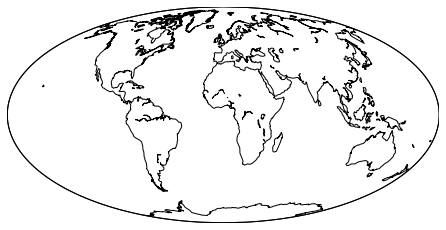

In [10]:
# Plot
fig = plt.figure()
fig.subplots_adjust(left=0., right=1., bottom=0., top=0.9)
# Setup the map. See http://matplotlib.org/basemap/users/mapsetup.html
# for other projections.
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
m.drawmapboundary()

In [11]:
fapar_cyclic, lons_cyclic = addcyclic(fapar, lons)
# Shift the grid so lons go from -180 to 180 instead of 0 to 360.


NameError: name 'fapar' is not defined

In [ ]:
air_cyclic, lons_cyclic = shiftgrid(180., air_cyclic, lons_cyclic, start=False)